In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv(r"C:\Users\bishw\OneDrive\UPDATED_NLP_COURSE\TextFiles\moviereviews2.tsv", sep='\t')

In [3]:
df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


In [4]:
df.isna().sum()

label      0
review    20
dtype: int64

In [5]:
df.loc[df.review.isna()==True,'review']='No Review'

In [6]:
df['review_len']=df.review.apply(len)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
label         6000 non-null object
review        6000 non-null object
review_len    6000 non-null int64
dtypes: int64(1), object(2)
memory usage: 140.8+ KB


In [8]:
df.label=df.label.astype('category')

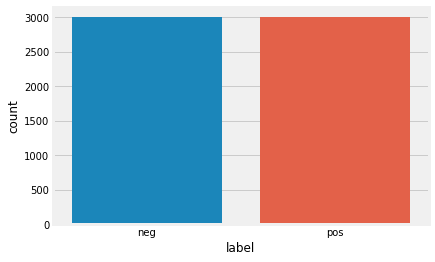

In [9]:
sns.countplot(df.label)

In [10]:
df.label.value_counts()

pos    3000
neg    3000
Name: label, dtype: int64

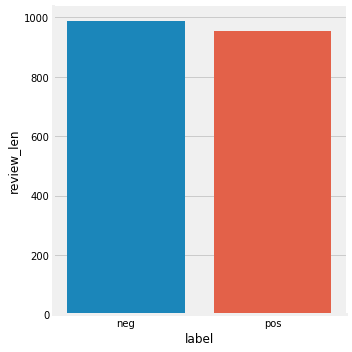

In [11]:
sns.catplot(x='label', y='review_len', data=df, kind='bar',ci=None)

In [12]:
df.pivot_table(values='review_len', index='label',aggfunc=['mean','median'])

,mean,median
,review_len,review_len
label,,
neg,987.800333,852
pos,954.258667,824


In [13]:
df.shape

(6000, 3)

In [14]:
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
snb=SnowballStemmer('english')
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(stop_words=list(text.ENGLISH_STOP_WORDS))


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [16]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
df['review'] = df.apply(lambda row: lem.lemmatize(row['review']),axis = 1)

In [17]:
X=df.loc[:,'review']
y=df.loc[:,'label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=df.label)

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
glm=LogisticRegression(class_weight='balanced')


In [21]:
steps1=[('vec',vec), ('glm',glm)]


In [22]:
pipe1=Pipeline(steps1)

In [23]:
pipe1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vec',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['much', 'whither', 'give',
                                             'always', 'should', 'themselves',
                                             'any...
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('g

In [24]:
from sklearn.metrics import classification_report, roc_auc_score

In [25]:
print(classification_report(y_test, pipe1.predict(X_test)))

              precision    recall  f1-score   support

         neg       0.91      0.89      0.90       900
         pos       0.90      0.91      0.90       900

    accuracy                           0.90      1800
   macro avg       0.90      0.90      0.90      1800
weighted avg       0.90      0.90      0.90      1800



In [26]:
print(f'AUROC:{roc_auc_score(y_test, pipe1.predict_proba(X_test)[:,1])}')

AUROC:0.9624024691358024


In [32]:
pipe1.predict(['I didn\'t enjoy the movie. The direction was bad and so was the acting.'])

array(['neg'], dtype=object)

In [33]:
pipe1.predict(['I  enjoyed the movie. The direction was okay but the acting was awesome.'])

array(['pos'], dtype=object)